# Exercise: Algorithm Chain

Anda bekerja sebagai data scientist di perusahaan asuransi. Anda diminta untuk memprediksi apakah seorang calon nasabah akan mengajukan klaim atau tidak ketika nantinya dia memiliki asuransi di perusahaan Anda. 

- Dataset: Car_Insurance_Claim.csv
- Target: 'OUTCOME'
    - 0: tidak mengajukan claim
    - 1: mengajukan claim
<br><br>

1. Definisikan FP dan FN dalam kasus asuransi kendaraan ini. Menurut Anda, manakah kesalahan yang memiliki cost lebih tinggi (FP atau FN)? Gunakan evaluation metric yang sesuai dengan kebutuhan bisnis!
1. Lakukan data cleaning jika diperlukan!
1. Lakukan EDA singkat untuk memahami dataset yang Anda gunakan!
1. Lakukan data splitting!
1. Lakukan preprocessing/feature engineering yang sesuai dengan kebutuhan!
1. Lakukan cross validation menggunakan beberapa algoritma ML yang sudah Anda kuasai. Pilih algoritma terbaik untuk melakukan modeling akhir!
1. Lakukan hyperparameter tuning pada model terpilih (dari cross validation). Pilih hyperparameter terbaik untuk melakukan modeling akhir!
1. Bandingkan performa model sebelum dan sesudah hyperparameter tuning, apakah performanya meningkat?
    - Model sebelum sebelum hyperparameter tuning
    - Model setelah setelah hyperparameter tuning

In [3]:
# !pip install category_encoders

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer


# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold

# metrics untuk regresi
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [5]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [7]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [8]:
df['POSTAL_CODE'].value_counts()
# sebaiknya diencoding

10238    6940
32765    2456
92101     484
21217     120
Name: POSTAL_CODE, dtype: int64

In [9]:
df.describe(include='object')

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


## EDA

In [10]:
# unique values in categorical columns

for i in df.describe(include='object').columns:
    print(i, '\n', df[i].unique(), '\n')

AGE 
 ['65+' '16-25' '26-39' '40-64'] 

GENDER 
 ['female' 'male'] 

RACE 
 ['majority' 'minority'] 

DRIVING_EXPERIENCE 
 ['0-9y' '10-19y' '20-29y' '30y+'] 

EDUCATION 
 ['high school' 'none' 'university'] 

INCOME 
 ['upper class' 'poverty' 'working class' 'middle class'] 

VEHICLE_YEAR 
 ['after 2015' 'before 2015'] 

VEHICLE_TYPE 
 ['sedan' 'sports car'] 



In [11]:
# missing values

df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [12]:
df.corr()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


In [13]:
# plt.figure(figsize = (20,20))
# sns.heatmap(df.sort_values('MARRIED')[['CREDIT_SCORE','ANNUAL_MILEAGE']].isna())

In [14]:
df['MARRIED'].value_counts()

# Data cukup balance

0.0    5018
1.0    4982
Name: MARRIED, dtype: int64

In [15]:
df['MARRIED'].sort_values()

0       0.0
4151    0.0
4150    0.0
4149    0.0
7958    0.0
       ... 
4485    1.0
4484    1.0
4483    1.0
4499    1.0
9999    1.0
Name: MARRIED, Length: 10000, dtype: float64

In [16]:
# untuk dimasukkan pada simple imputer
df[df['MARRIED']==1]['ANNUAL_MILEAGE'].median()

10000.0

In [17]:
df['ANNUAL_MILEAGE'].median()

12000.0

<AxesSubplot: xlabel='CREDIT_SCORE', ylabel='Count'>

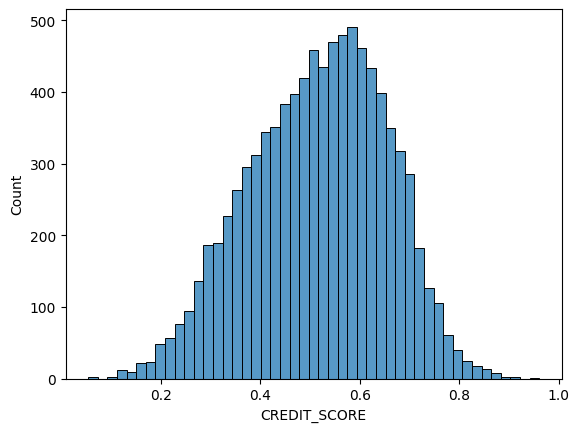

In [18]:
sns.histplot(data=df, x='CREDIT_SCORE')

In [19]:
print(df['CREDIT_SCORE'].mean())
print(df['CREDIT_SCORE'].median())

0.515812809602791
0.5250327586154788


<AxesSubplot: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

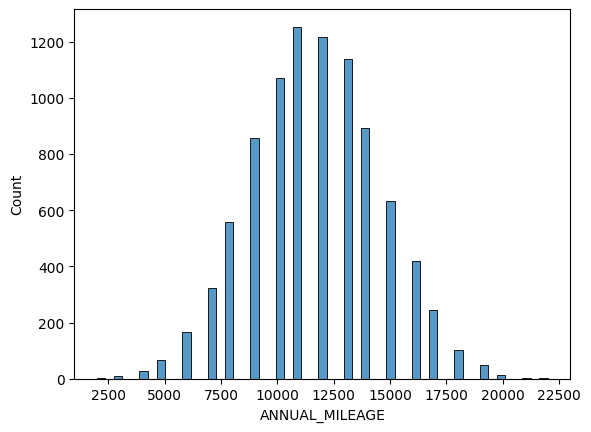

In [20]:
sns.histplot(data=df, x='ANNUAL_MILEAGE')

In [21]:
print(df['ANNUAL_MILEAGE'].mean())
print(df['ANNUAL_MILEAGE'].median())
print(df['ANNUAL_MILEAGE'].mode()[0])


11697.003206900365
12000.0
11000.0


In [22]:
# Outcome

df['OUTCOME'].value_counts()

# mild imbalance

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

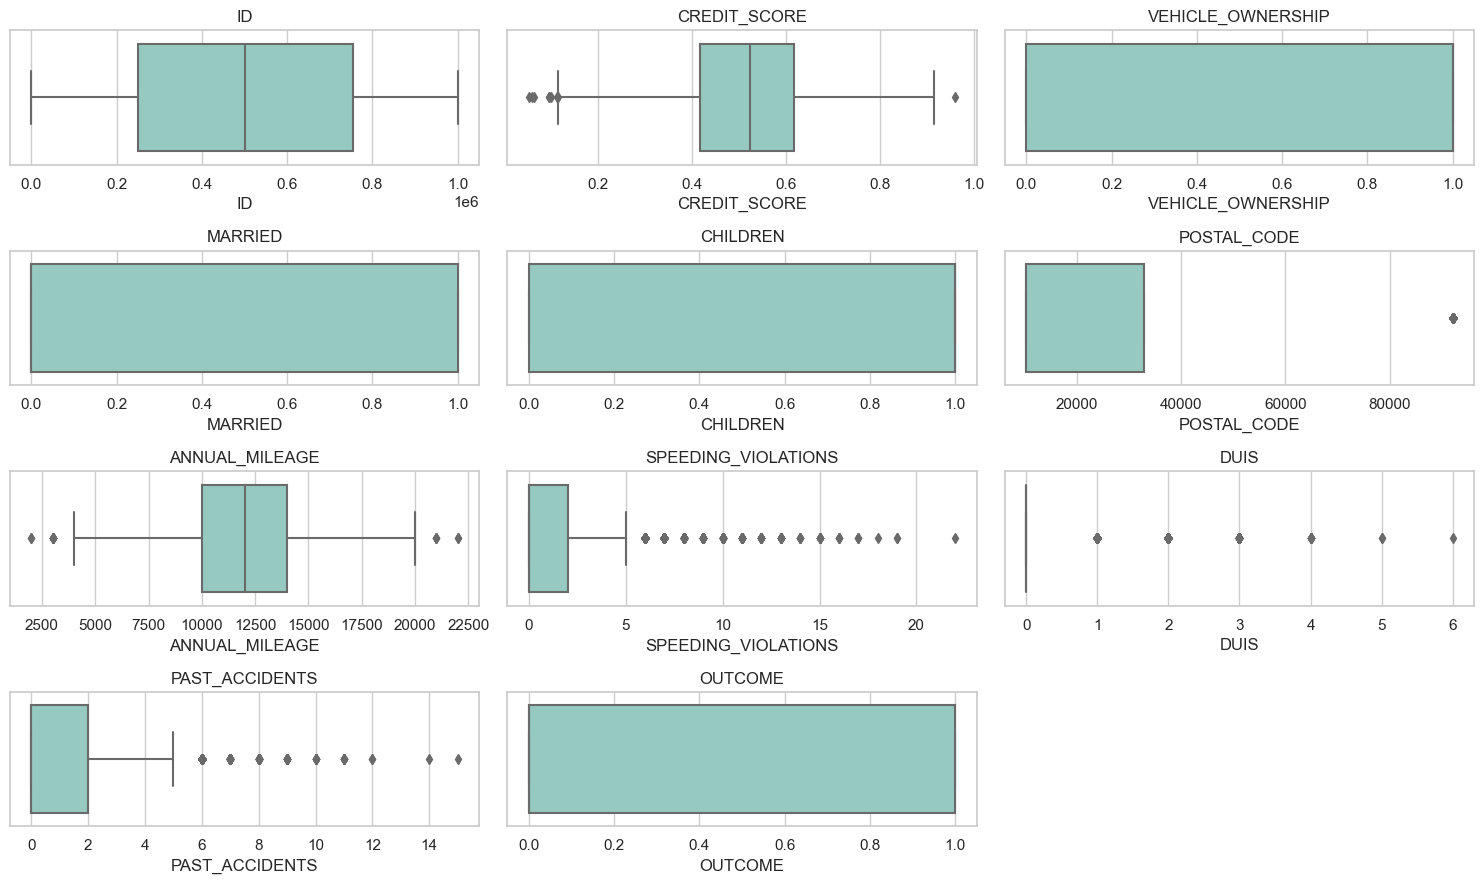

In [23]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [24]:
df.duplicated().sum()

0

In [25]:
df['POSTAL_CODE'].nunique()

4

## Data Splitting

In [26]:
# Define X and y
X = df.drop(columns=['OUTCOME','ID'])
y = df['OUTCOME']

In [27]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

## Preprocessing

Impute
- Median:
    - 'CREDIT_SCORE'
    - 'ANNUAL_MILEAGE'

Encode:
- Ordinal Encoder:
    - 'AGE' 
    - 'DRIVING_EXPERIENCE'
    - 'EDUCATION'
    - 'INCOME'
- One Hot Encoder:
    - 'GENDER'
    - 'RACE'
    - 'VEHICLE_YEAR'
    - 'VEHICLE_TYPE'

Scaler:
- MinMax
- Standard
- Robust

In [28]:
# df.describe(include='object')

In [29]:
df['AGE'].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

In [30]:
X.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')

In [31]:
# ordinal mapping 1
ordinal_mapping1 = [
    {'col':'AGE', 'mapping':{'16-25':20, '26-39':33, '40-64':47, '65+':70, None:0}},
    {'col':'DRIVING_EXPERIENCE', 'mapping':{'0-9y':5, '10-19y':15, '20-29y':25 , '30y+':35, None:0}},
    {'col':'EDUCATION', 'mapping':{'high school':12, 'university':16, 'none':0, None:0}},
    {'col':'INCOME', 'mapping':{'poverty':1, 'working class':2, 'middle class':3, 'upper class':4, None:0}} 
] 

# ordinal mapping 2
ordinal_mapping2 = [
    {'col':'AGE', 'mapping':{'16-25':1, '26-39':2, '40-64':3, '65+':4, None:0}},
    {'col':'DRIVING_EXPERIENCE', 'mapping':{'0-9y':1, '10-19y':2, '20-29y':3 , '30y+':4, None:0}},
    {'col':'EDUCATION', 'mapping':{'high school':1, 'university':2, 'none':0, None:0}},
    {'col':'INCOME', 'mapping':{'poverty':1, 'working class':2, 'middle class':3, 'upper class':4, None:0}} 
] 

In [32]:
# transformer 

pipe_median_scale = Pipeline([
    ('imp_median', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME'], mapping=ordinal_mapping1)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('pipe_median_scale', pipe_median_scale, ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME']),
    ('onehot', OneHotEncoder(drop='first'), ['GENDER', 'RACE', 'VEHICLE_YEAR','VEHICLE_TYPE', 'POSTAL_CODE']),
], remainder='passthrough')

In [33]:
# scaler
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

## Benchmark Model

In [34]:
# Define the models
logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)

In [35]:
# Pilihan model
models = [logreg, knn, tree]

cv_mean = []
cv_std = []
cv_all = []


# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for i in models:
    
    skfold = StratifiedKFold(n_splits = 5)

    model_pipe = Pipeline([
            ('prep', transformer), 
            ('model', i)])
    
    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv = skfold, 
        scoring = 'f1',
        error_score='raise'
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [36]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,LogisticRegression(solver='liblinear'),0.755006,0.015244,"[0.7537, 0.7351, 0.7578, 0.7814, 0.7471]"
1,KNeighborsClassifier(),0.676064,0.010301,"[0.6822, 0.6776, 0.6577, 0.6884, 0.6744]"
2,"DecisionTreeClassifier(max_depth=5, random_sta...",0.735321,0.015370,"[0.7404, 0.717, 0.7457, 0.7556, 0.7179]"


## Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

### Grid Search

In [38]:
# len(X_train)

In [39]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_median_scale',
                                 Pipeline(steps=[('imp_median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
                                  'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
                                  'SPEEDING_VIOLATIONS', 'DUIS',
                                  'PAST_ACCIDENTS']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEnc...
                                                                           'mapping': high school    12
university     16
none            0
None            0
dtype: int64},
                                                                          {'col': 'INCOME',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': poverty          1
working class    2
middle class     3
upper class      4
None             0
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['GENDER', 'RACE', 'VEHICLE_YEAR',
                                  'VEHICLE_TYPE', 'POSTAL_CODE'])])

In [40]:
# hyperparameter untuk Decision Tree
hyperparam_space = {
    'algo__max_depth':[2,3,4,5,6,7],                            # 6  
    'algo__min_samples_split':[2,5,10,15,20,50,100],            # 7
    'algo__min_samples_leaf':[2,5,10,15,20,50,100],             # 7
    'prep__pipe_median_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__scaler': [minmax, standard, robust]
}                                                       # 294 kombinasi model dengan hyperparameter berbeda   

# pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('algo', tree)                  # benchmark model terpilih
])

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,           # model  
    param_grid=hyperparam_space,    # hyperparameter yang mau dituning
    cv=5,                           # jumlah fold  
    scoring='f1',                   # metrics
    n_jobs=-1                       # pakai semua processor
)

In [41]:
# fitting 
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_median_scale',
                                                                         Pipeline(steps=[('imp_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['CREDIT_SCORE',
                                                                          'VEHICLE_OWNERSHIP',
                                                                          'MARRIED',
                                                                          'CHILDREN',
                                                                          'ANNUAL_MILEAGE',
                                                                          'SPEEDING_VIOLATIONS',
                                                                          'DUIS',
                                                                          'PAST_ACCIDENTS']),
                                                                        ('pipe_...
                                        DecisionTreeClassifier(max_depth=5,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [2, 3, 4, 5, 6, 7],
                         'algo__min_samples_leaf': [2, 5, 10, 15, 20, 50, 100],
                         'algo__min_samples_split': [2, 5, 10, 15, 20, 50, 100],
                         'prep__pipe_median_scale__scaler': [MinMaxScaler(),
                                                             StandardScaler(),
                                                             RobustScaler()],
                         'prep__pipe_ordinal_scale__scaler': [MinMaxScaler(),
                                                              StandardScaler(),
                                                              RobustScaler()]},
             scoring='f1')

In [42]:
# score terbaik
gridsearch.best_score_

0.7457298638169126

In [43]:
# hyperparameter terbaik
gridsearch.best_params_

{'algo__max_depth': 7,
 'algo__min_samples_leaf': 2,
 'algo__min_samples_split': 100,
 'prep__pipe_median_scale__scaler': MinMaxScaler(),
 'prep__pipe_ordinal_scale__scaler': MinMaxScaler()}

In [44]:
# model terbaik
gridsearch.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_median_scale',
                                                  Pipeline(steps=[('imp_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('pipe_ordinal_scale',
                                                  Pipeline(step...
                                                                                            'mapping': poverty          1
working class    2
middle class     3
upper class      4
None             0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['GENDER', 'RACE',
                                                   'VEHICLE_YEAR',
                                                   'VEHICLE_TYPE',
                                                   'POSTAL_CODE'])])),
                ('algo',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=2,
                                        min_samples_split=100,
                                        random_state=0))])

In [45]:
# score MAE pada tiap kombinasi hyperparameter
cv_output = pd.DataFrame(gridsearch.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__max_depth,param_algo__min_samples_leaf,param_algo__min_samples_split,param_prep__pipe_median_scale__scaler,param_prep__pipe_ordinal_scale__scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2263,0.138991,0.005127,0.027382,0.003773,7,2,100,StandardScaler(),StandardScaler(),"{'algo__max_depth': 7, 'algo__min_samples_leaf...",0.75632,0.72458,0.734818,0.760396,0.752535,0.74573,0.013711,1
2262,0.135880,0.008849,0.038885,0.006406,7,2,100,StandardScaler(),MinMaxScaler(),"{'algo__max_depth': 7, 'algo__min_samples_leaf...",0.75632,0.72458,0.734818,0.760396,0.752535,0.74573,0.013711,1
2261,0.133246,0.000866,0.028727,0.003310,7,2,100,MinMaxScaler(),RobustScaler(),"{'algo__max_depth': 7, 'algo__min_samples_leaf...",0.75632,0.72458,0.734818,0.760396,0.752535,0.74573,0.013711,1
2260,0.138552,0.012717,0.033974,0.009634,7,2,100,MinMaxScaler(),StandardScaler(),"{'algo__max_depth': 7, 'algo__min_samples_leaf...",0.75632,0.72458,0.734818,0.760396,0.752535,0.74573,0.013711,1
2259,0.134062,0.007610,0.030364,0.004298,7,2,100,MinMaxScaler(),MinMaxScaler(),"{'algo__max_depth': 7, 'algo__min_samples_leaf...",0.75632,0.72458,0.734818,0.760396,0.752535,0.74573,0.013711,1


### Randomized Search

In [46]:
X.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')

In [47]:
# hyperparameter untuk Decision Tree
hyperparam_space = {
    'algo__max_depth':range(2,20,1),            # 19                   
    'algo__min_samples_split':range(2,100,1),   # 99        
    'algo__min_samples_leaf':range(1,100,1),    # 100         
    'prep__pipe_median_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__ordinal__mapping': [ordinal_mapping1, ordinal_mapping2]
}                                                         

# pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('algo', tree)          # benchmark model terpilih
])

In [48]:
# Define Randomized Search

random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=10,
    n_iter=200                 # jumlah kombinasi hyperparameter yang akan dihasilkan
)

In [49]:
# fitting 
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_median_scale',
                                                                               Pipeline(steps=[('imp_median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['CREDIT_SCORE',
                                                                                'VEHICLE_OWNERSHIP',
                                                                                'MARRIED',
                                                                                'CHILDREN',
                                                                                'ANNUAL_MILEAGE',
                                                                                'SPEEDING_VIOLATIONS',
                                                                                'DUIS',
                                                                                'PAST_ACCIDENTS']),
                                                                              (...
                                                                                         'mapping': {None: 0,
                                                                                                     '0-9y': 1,
                                                                                                     '10-19y': 2,
                                                                                                     '20-29y': 3,
                                                                                                     '30y+': 4}},
                                                                                        {'col': 'EDUCATION',
                                                                                         'mapping': {None: 0,
                                                                                                     'high school': 1,
                                                                                                     'none': 0,
                                                                                                     'university': 2}},
                                                                                        {'col': 'INCOME',
                                                                                         'mapping': {None: 0,
                                                                                                     'middle class': 3,
                                                                                                     'poverty': 1,
                                                                                                     'upper class': 4,
                                                                                                     'working class': 2}}]],
                                        'prep__pipe_ordinal_scale__scaler': [MinMaxScaler(),
                                                                             StandardScaler(),
                                                                             RobustScaler()]},
                   random_state=10, scoring='f1')

In [50]:
# score terbaik
random_search.best_score_

0.7514493792855339

In [51]:
# hyperparameter terbaik
random_search.best_params_

{'prep__pipe_ordinal_scale__scaler': StandardScaler(),
 'prep__pipe_ordinal_scale__ordinal__mapping': [{'col': 'AGE',
   'mapping': 16-25    20
   26-39    33
   40-64    47
   65+      70
   None      0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'DRIVING_EXPERIENCE',
   'mapping': 0-9y       5
   10-19y    15
   20-29y    25
   30y+      35
   None       0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'EDUCATION',
   'mapping': high school    12
   university     16
   none            0
   None            0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'INCOME',
   'mapping': poverty          1
   working class    2
   middle class     3
   upper class      4
   None             0
   dtype: int64,
   'data_type': dtype('O')}],
 'prep__pipe_median_scale__scaler': MinMaxScaler(),
 'algo__min_samples_split': 60,
 'algo__min_samples_leaf': 29,
 'algo__max_depth': 16}

In [52]:
# model terbaik
# random_search.best_estimator_

In [53]:
# score MAE pada tiap kombinasi hyperparameter
cv_output = pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prep__pipe_ordinal_scale__scaler,param_prep__pipe_ordinal_scale__ordinal__mapping,param_prep__pipe_median_scale__scaler,param_algo__min_samples_split,param_algo__min_samples_leaf,param_algo__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
151,0.144289,0.004738,0.032666,0.005603,StandardScaler(),"[{'col': 'AGE', 'mapping': [20, 33, 47, 70, 0]...",MinMaxScaler(),60,29,16,{'prep__pipe_ordinal_scale__scaler': StandardS...,0.746146,0.729941,0.744980,0.777559,0.758621,0.751449,0.015911,1
141,0.155788,0.008447,0.029648,0.004053,StandardScaler(),"[{'col': 'AGE', 'mapping': [20, 33, 47, 70, 0]...",StandardScaler(),5,29,12,{'prep__pipe_ordinal_scale__scaler': StandardS...,0.746146,0.727094,0.744980,0.777559,0.758621,0.750880,0.016702,2
20,0.200297,0.026113,0.045861,0.007995,StandardScaler(),"[{'col': 'AGE', 'mapping': {'16-25': 1, '26-39...",RobustScaler(),38,28,18,{'prep__pipe_ordinal_scale__scaler': StandardS...,0.747967,0.727094,0.740061,0.776680,0.758621,0.750085,0.016815,3
188,0.155696,0.011038,0.033939,0.005480,MinMaxScaler(),"[{'col': 'AGE', 'mapping': {'16-25': 1, '26-39...",RobustScaler(),30,27,18,{'prep__pipe_ordinal_scale__scaler': MinMaxSca...,0.755556,0.725838,0.733401,0.775470,0.757360,0.749525,0.017843,4
3,0.231066,0.023354,0.057955,0.013240,StandardScaler(),"[{'col': 'AGE', 'mapping': [20, 33, 47, 70, 0]...",StandardScaler(),35,32,13,{'prep__pipe_ordinal_scale__scaler': StandardS...,0.738720,0.733463,0.747475,0.771229,0.756098,0.749397,0.013365,5


Performa model di Train Set
- Benchmark model: 0.729
- Hyperparameter Tuning (GridSearchCV): 0.747
- Hyperparameter Tuning (RandomizedSearchCV): 0.750


## Predict to Test Set

- Melakukan prediksi pada test set dengan menggunakan model terbaik dan hyperparameter terbaik.
- Membandingkan performa model sebelum tuning dan setelah tuning.


### Before Tuning

In [54]:
# define model
model = DecisionTreeClassifier(max_depth=5)
pipe_model = Pipeline([
    ('transformer',transformer),
    ('scaler', robust),
    ('algo', model)          # benchmark model terpilih
])

# fitting
pipe_model.fit(X_train, y_train)

# predict
y_pred_benchmark = pipe_model.predict(X_test)
f1_score(y_test, y_pred_benchmark)


0.7531172069825437

### After Tuning 

**GridSearch**

In [55]:
# menggunakan model terbaik hasil gridsearch
model = gridsearch.best_estimator_
model.fit(X_train, y_train)

y_pred_gridsearch = model.predict(X_test)
f1_score(y_test, y_pred_gridsearch) 

0.768621236133122

**RandomizedSearch**

In [56]:
# menggunakan model terbaik hasil random_search
model = random_search.best_estimator_
model.fit(X_train, y_train)

y_pred_randomizedsearch = model.predict(X_test)
f1_score(y_test, y_pred_randomizedsearch)

0.7671665351223361

## Summary

Performa Decision Tree pada Train Set

In [57]:
print(df_cv.loc[2, 'mean'].round(4), 'Score Benchmark (sebelum hyperparameter tuning)')
print(gridsearch.best_score_.round(4), 'Score Model hasil GridSearch (setelah hyperparameter tuning)')
print(random_search.best_score_.round(4), 'Score Model hasil RandomizedSearch (setelah hyperparameter tuning)') 

0.7353 Score Benchmark (sebelum hyperparameter tuning)
0.7457 Score Model hasil GridSearch (setelah hyperparameter tuning)
0.7514 Score Model hasil RandomizedSearch (setelah hyperparameter tuning)


Performa Decision Tree pada Test Set

In [58]:
print(f1_score(y_test, y_pred_benchmark).round(4), 'Score Benchmark (sebelum hyperparameter tuning)')
print(f1_score(y_test, y_pred_gridsearch).round(4), 'Score Model hasil GridSearch (setelah hyperparameter tuning)')
print(f1_score(y_test, y_pred_randomizedsearch).round(4), 'Score Model hasil RandomizedSearch (setelah hyperparameter tuning)')


0.7531 Score Benchmark (sebelum hyperparameter tuning)
0.7686 Score Model hasil GridSearch (setelah hyperparameter tuning)
0.7672 Score Model hasil RandomizedSearch (setelah hyperparameter tuning)


---
---

In [59]:
print(classification_report(y_test, y_pred_gridsearch))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1373
         1.0       0.76      0.77      0.77       627

    accuracy                           0.85      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.85      0.85      0.85      2000



In [60]:
# model.predict_proba(X_test)

In [61]:
# predict probabilities
y_pred_proba = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_pred_proba = y_pred_proba[:, 1]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [62]:
df_pr_curve = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve.head()

,precision,recall,thresholds
124,1.000000,0.000000,0.000000
122,0.976190,0.130781,0.982143
123,0.971831,0.110048,1.000000
119,0.957983,0.181818,0.947368
120,0.952830,0.161085,0.953488


''

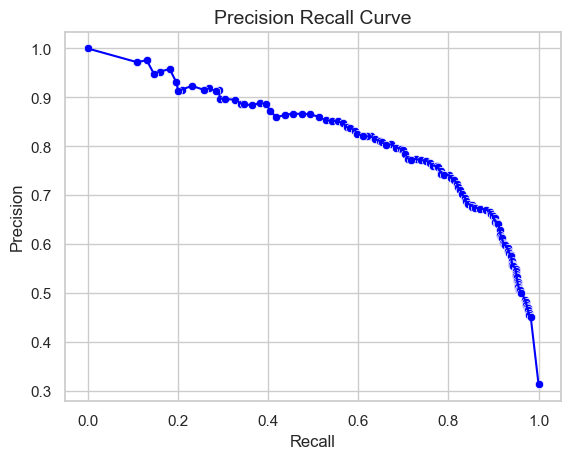

In [63]:
# Cara buat Precision Recall Curve manual

sns.lineplot(data=df_pr_curve, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve, x='recall', y='precision', color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve', size=14)
;

In [64]:
# PR curve
plot_precision_recall_curve(model, X_test, y_test);

NameError: name 'plot_precision_recall_curve' is not defined

In [ ]:
confusion_matrix(y_test, y_pred_gridsearch)

array([[1223,  150],
       [ 142,  485]], dtype=int64)

### Confusion Matrix

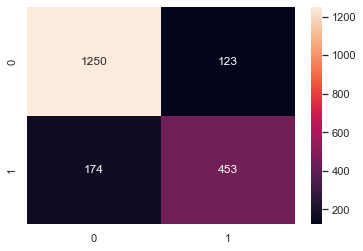

In [ ]:
# Model sebelum tuning
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='g');

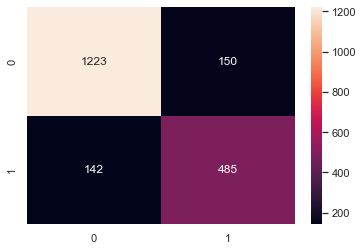

In [ ]:
# Model setelah tuning
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearch), annot=True, fmt='g');

- TP: 485 (diprediksi melakukan claim, dan aktualnya juga melakukan claim)
- TN: 1223 (diprediksi tidak melakukan claim, dan aktualnya juga tidak melakukan claim)
- FP: 150 (diprediksi melakukan claim, tapi aktualnya TIDAK melakukan claim)
- FN: 142 (diprediksi TIDAK melakukan claim, tapi aktualnya melakukan claim)

**FP cost:** 
- Kita memprediksi si calon nasabah akan melakukan klaim yg mana akan membuat perusahaan mengeluarkan uang, padahal ternyata aktualnya dia tidak melakukan claim. 
- Karena kita memprediksi si calon nasabah akan melakukan klaim, jadi tidak kita prospek/hubungi.
- Akibatnya kita kehilangan calon nasabah yg sebenarnya akan meberi keuntungan untuk kita.

**FN cost:** 
- Kita memprediksi si calon nasabah TIDAK akan melakukan klaim, yg artinya TIDAK akan membuat perusahaan mengeluarkan uang, padahal ternyata aktualnya dia melakukan claim. 
- Karena kita memprediksi si calon nasabah TIDAK akan melakukan klaim, jadi kita prospek/hubungi, dan si calon nasabah akan menjadi nasabah.
- Akibatnya kita mengeluarkan biaya tidak terduga untuk membayar claim tersebut.

In [ ]:
# ?plot_tree

In [ ]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_median_scale',
                                 Pipeline(steps=[('imp_median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
                                  'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
                                  'SPEEDING_VIOLATIONS', 'DUIS',
                                  'PAST_ACCIDENTS']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEnc...
                                                                          {'col': 'EDUCATION',
                                                                           'mapping': {None: 0,
                                                                                       'high school': 12,
                                                                                       'none': 0,
                                                                                       'university': 16}},
                                                                          {'col': 'INCOME',
                                                                           'mapping': {None: 0,
                                                                                       'middle class': 3,
                                                                                       'poverty': 1,
                                                                                       'upper class': 4,
                                                                                       'working class': 2}}])),
                                                 ('scaler', RobustScaler())]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['GENDER', 'RACE', 'VEHICLE_YEAR',
                                  'VEHICLE_TYPE', 'POSTAL_CODE'])])

In [ ]:
f_num = transformer.transformers[0][2]
f_num

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

In [ ]:
f_ordinal = transformer.transformers[1][2]
f_ordinal

['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME']

In [ ]:
f_onehot = list(transformer.named_transformers_['onehot'].get_feature_names_out())
f_onehot

['GENDER_male',
 'RACE_minority',
 'VEHICLE_YEAR_before 2015',
 'VEHICLE_TYPE_sports car',
 'POSTAL_CODE_21217',
 'POSTAL_CODE_32765',
 'POSTAL_CODE_92101']

In [ ]:
list(transformer.transformers_[2][1].get_feature_names_out())

['GENDER_male',
 'RACE_minority',
 'VEHICLE_YEAR_before 2015',
 'VEHICLE_TYPE_sports car',
 'POSTAL_CODE_21217',
 'POSTAL_CODE_32765',
 'POSTAL_CODE_92101']

In [ ]:
feat = f_num + f_ordinal + f_onehot 
feat

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'AGE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'GENDER_male',
 'RACE_minority',
 'VEHICLE_YEAR_before 2015',
 'VEHICLE_TYPE_sports car',
 'POSTAL_CODE_21217',
 'POSTAL_CODE_32765',
 'POSTAL_CODE_92101']

In [ ]:
pd.DataFrame({
    'feat': feat,
    'imp': model['algo'].feature_importances_
}).sort_values('imp', ascending=False)

,feat,imp
9,DRIVING_EXPERIENCE,0.517490
1,VEHICLE_OWNERSHIP,0.144060
14,VEHICLE_YEAR_before 2015,0.136227
16,POSTAL_CODE_21217,0.049419
12,GENDER_male,0.041719
4,ANNUAL_MILEAGE,0.028091
0,CREDIT_SCORE,0.026253
17,POSTAL_CODE_32765,0.021277
2,MARRIED,0.010931
5,SPEEDING_VIOLATIONS,0.005067


In [ ]:
# random_search.best_estimator_['algo']

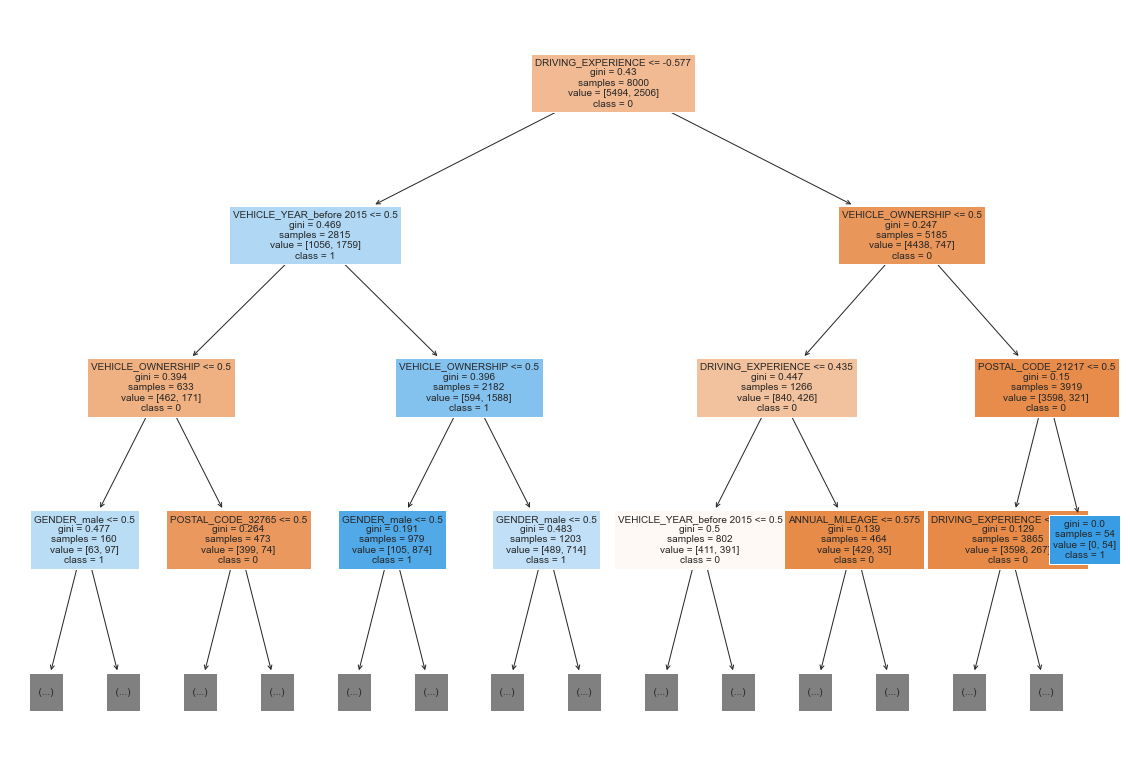

In [ ]:
plt.figure(figsize = (20,14))
plot_tree(model['algo'], filled = True, class_names = ['0','1'], fontsize=10, max_depth=3, feature_names=feat)
plt.show()

In [ ]:
y.value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64